In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'data-for-test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'data-for-test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


In [13]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

8/8 [==============================] - 11s 1s/step - loss: 1.8366 - accuracy: 0.4167 - val_loss: 0.8195 - val_accuracy: 0.5833
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 0.5574 - accuracy: 0.7833 - val_loss: 0.4315 - val_accuracy: 0.8833
Epoch 3/10
8/8 [==============================] - 8s 1s/step - loss: 0.2742 - accuracy: 0.8958 - val_loss: 0.3249 - val_accuracy: 0.9167
Epoch 4/10
8/8 [==============================] - 8s 1s/step - loss: 0.1897 - accuracy: 0.9375 - val_loss: 1.0029 - val_accuracy: 0.7667
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 0.1390 - accuracy: 0.9625 - val_loss: 0.4931 - val_accuracy: 0.8000
Epoch 6/10
8/8 [==============================] - 8s 1s/step - loss: 0.0665 - accuracy: 0.9750 - val_loss: 0.7723 - val_accuracy: 0.7667
Epoch 7/10
8/8 [==============================] - 8s 1s/step - loss: 0.0832 - accuracy: 0.9625 - val_loss: 0.6227 - val_accuracy: 0.8167
Epoch 8/10
8/8 [==============================] - 8

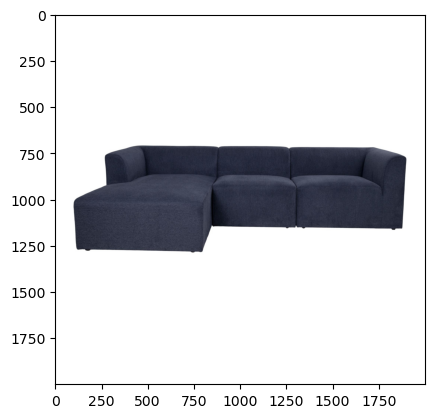

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('data-for-test/Sofa/Alba Lounge Sofa.jpg')

# Output the image using imshow()
plt.imshow(img)
plt.show()


In [15]:
import os
import cv2
import numpy as np
from tensorflow import keras

# Define the classes
class_names = ['bed', 'chair', 'sofa']

# Save the model
model.save('my_model.h5')

# Load the model
model = keras.models.load_model('my_model.h5')

# Load a new image and preprocess it
image_path = 'data-for-test/Sofa/Alba Lounge Sofa.jpg'
image = cv2.imread(image_path)
image = cv2.resize(image, (150, 150))
image = np.expand_dims(image, axis=0)
image = image / 255.0

# Make the prediction
prediction = model.predict(image)

# Get the class with highest probability
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

# Print the predicted class
print("The predicted class is:", predicted_class)


1/1 [==============================] - 0s 41ms/step
The predicted class is: sofa


In [16]:
import matplotlib.pyplot as plt


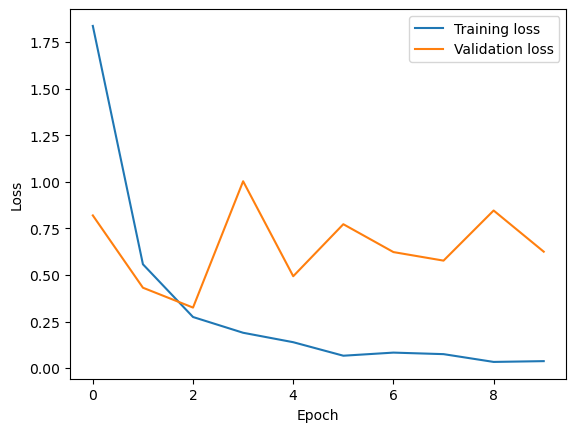

In [17]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

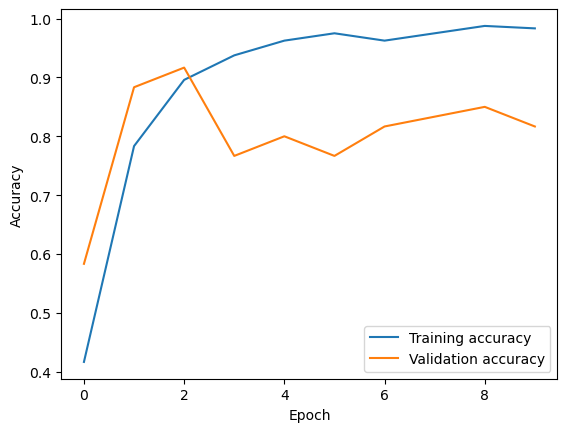

In [18]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()